## 5 Data sets

There is a lot of Documentation on this subject. Here we will breifly introduce Series and Dataframes to help research with DataBases

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 5.1 - Series

"Series" is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

In [3]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print s

a    1.016596
b    0.671536
c    0.170285
d   -1.458693
e    0.766828
dtype: float64


In [4]:
s['a']

1.0165958426274757

In [5]:
s[0]

1.0165958426274757

In [6]:
s['c']*3.0

0.51085425386108696

In [7]:
np.exp(s)

a    2.763770
b    1.957241
c    1.185642
d    0.232540
e    2.152926
dtype: float64

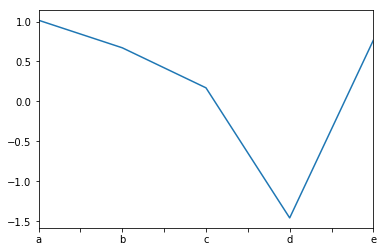

In [8]:
s.plot()

In [9]:
pl1 = pd.Series(np.array([25, 1, 12, 4]), index=['Liga', 'Cup', 'Europe', 'Other'], name='Ronaldo')
print pl1

Liga      25
Cup        1
Europe    12
Other      4
Name: Ronaldo, dtype: int64


In [10]:
np.sum(pl1)

42L

In [11]:
pl2 = pd.Series(np.array([37, 5, 11, 1]), index=['Liga', 'Cup', 'Europe', 'Other'], name="Messi")
print pl2

Liga      37
Cup        5
Europe    11
Other      1
Name: Messi, dtype: int64


In [12]:
np.sum(pl2)

54L

In [14]:
pl1 + pl2

Liga      62
Cup        6
Europe    23
Other      5
dtype: int64

In [15]:
pl1['Liga'] + pl2['Liga']

62

In [16]:
print "Total goals scored:", np.sum(pl1 + pl2)
print "Total goals scored:", np.sum(pl1) + np.sum(pl2)

Total goals scored: 96
Total goals scored: 96


In [17]:
pl1.mean()

10.5

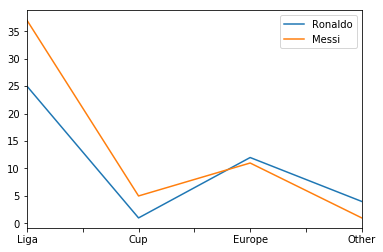

In [19]:
pl1.plot()
pl2.plot()
plt.legend()
plt.show()

## 5.2 - Dataframes

A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

In [20]:
import webbrowser
url = 'https://en.wikipedia.org/wiki/2016%E2%80%9317_Primeira_Liga#Attendances'
webbrowser.open(url)

True

In [26]:
df = pd.read_csv('Files/Attendances.csv')#, thousands=',')
##Get a single sheet
#df = pd.ExcelFile('Files/Attendances.xlsx').parse('Final')
#df = pd.read_excel('Files/Attendances.xlsx', sheet='Final')
#Or read_json (not in this class)
#Or read from clipboard (additional packaged needed)
#df = pd.read_clipboard()
df.head()

,Pos,Team,Total,High,Low,Average,Change
0,1,Benfica,951184,64591,46256,55952,+11.1%
1,2,Sporting CP,727121,49399,32457,42772,+6.9%
2,3,Porto,631202,50019,22208,37130,+14.8%
3,4,Vitória de Guimarães,318856,26985,12953,18756,+50.9%
4,5,Braga,195366,24836,5545,11492,+2.9%


In [27]:
df.head(3)

,Pos,Team,Total,High,Low,Average,Change
0,1,Benfica,951184,64591,46256,55952,+11.1%
1,2,Sporting CP,727121,49399,32457,42772,+6.9%
2,3,Porto,631202,50019,22208,37130,+14.8%


In [28]:
df.tail(2)

,Pos,Team,Total,High,Low,Average,Change
16,17,Arouca,37383,5603,640,2199,−2.0%
17,18,Moreirense,29030,5351,658,1708,−40.7%


In [ ]:
df

In [29]:
df.loc[4]

Pos             5
Team        Braga
Total      195366
High        24836
Low          5545
Average     11492
Change      +2.9%
Name: 4, dtype: object

In [30]:
df = pd.read_csv('Files/Attendances.csv', index_col='Pos')

In [31]:
df.head(3)

,Team,Total,High,Low,Average,Change
Pos,,,,,,
1,Benfica,951184,64591,46256,55952,+11.1%
2,Sporting CP,727121,49399,32457,42772,+6.9%
3,Porto,631202,50019,22208,37130,+14.8%


In [43]:
df.iloc[-1]

Team       Moreirense
Total           29030
High             5351
Low               658
Average          1708
Change         −40.7%
Name: 18, dtype: object

In [44]:
df[['Team','Average']]

,Team,Average
Pos,,
1,Benfica,55952
2,Sporting CP,42772
3,Porto,37130
4,Vitória de Guimarães,18756
5,Braga,11492
6,Marítimo,7818
7,Boavista,6086
8,Belenenses,4047
9,Rio Ave,3954


In [45]:
#How many people during a Match Day went to a game
df['Average'].sum()/2

106478L

You need to be careful and make sure your database is conviniently formatted. Here, the Portuguese convention for the thousands separator, a comma, ruined our chances of having floats or ints. No math is possible, so we must replace it in the database.

In [ ]:
#Fields we want to change
df[['Total','High','Low','Average']].replace(to_replace=',', value='', regex=True).astype(int)

In [ ]:
#df2

In [ ]:
#df2.mean()

In [46]:
#To replace with a similar dataframe as the original
# ndf = df does not work, as if you change ndf you will change df as well
ndf = df.copy(deep=True)
#ndf[['Total','High','Low','Average']] = df[['Total','High','Low','Average']].replace(to_replace=',', value='', regex=True).astype(int)

In [47]:
ndf.head()

,Team,Total,High,Low,Average,Change
Pos,,,,,,
1,Benfica,951184,64591,46256,55952,+11.1%
2,Sporting CP,727121,49399,32457,42772,+6.9%
3,Porto,631202,50019,22208,37130,+14.8%
4,Vitória de Guimarães,318856,26985,12953,18756,+50.9%
5,Braga,195366,24836,5545,11492,+2.9%


In [51]:
ndf.drop(['Change'], axis=1, inplace=True)

ValueError: labels ['Change'] not contained in axis

In [52]:
ndf.head()

,Team,Total,High,Low,Average
Pos,,,,,
1,Benfica,951184,64591,46256,55952
2,Sporting CP,727121,49399,32457,42772
3,Porto,631202,50019,22208,37130
4,Vitória de Guimarães,318856,26985,12953,18756
5,Braga,195366,24836,5545,11492


In [53]:
ndf[ndf['Total']>100000]

,Team,Total,High,Low,Average
Pos,,,,,
1,Benfica,951184,64591,46256,55952
2,Sporting CP,727121,49399,32457,42772
3,Porto,631202,50019,22208,37130
4,Vitória de Guimarães,318856,26985,12953,18756
5,Braga,195366,24836,5545,11492
6,Marítimo,132909,10454,4150,7818
7,Boavista,103461,16157,3955,6086


In [56]:
ndf.sort_values('High', ascending=False)

,Team,Total,High,Low,Average
Pos,,,,,
1,Benfica,951184,64591,46256,55952
3,Porto,631202,50019,22208,37130
2,Sporting CP,727121,49399,32457,42772
4,Vitória de Guimarães,318856,26985,12953,18756
5,Braga,195366,24836,5545,11492
7,Boavista,103461,16157,3955,6086
8,Belenenses,68799,12236,1309,4047
6,Marítimo,132909,10454,4150,7818
10,Chaves,65320,10109,2081,3842


print the line where condition is met

In [57]:
ndf.loc[ndf['Low'].idxmin()]

Team       Arouca
Total       37383
High         5603
Low           640
Average      2199
Name: 17, dtype: object

In [58]:
ndf.loc[ndf['Low'].idxmax()]

Team       Benfica
Total       951184
High         64591
Low          46256
Average      55952
Name: 1, dtype: object

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
#Make it nicer
matplotlib.style.use('ggplot')

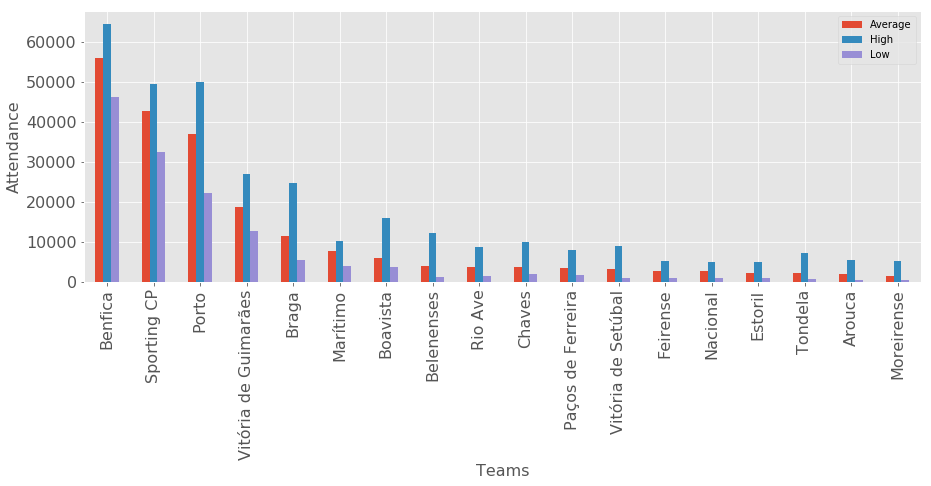

In [60]:
#ax = ndf[['Average','High','Low']].plot(x=ndf['Team'], kind='bar')
fnt_size=16
ax = ndf[['Average','High','Low']].plot(x=ndf['Team'], kind='bar', figsize=(15,5), fontsize=fnt_size)
ax.set_xlabel('Teams', fontsize=fnt_size)
ax.set_ylabel('Attendance', fontsize=fnt_size)
plt.show()

## 5.3 - Extra: Seaborn as a visualization and statistical analysis platform for pandas

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [61]:
%matplotlib inline
import pandas as pd
from pandas_datareader import DataReader #Install it from the anaconda navigator
from datetime import datetime
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Real-life example: Read the stock price evolution from yahoo finance.

In [62]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [63]:
# Set up End and Start times for data grab (last year)
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [65]:
# General Info
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-13,764.479980,766.219971,755.799988,759.690002,759.690002,1395000
2016-09-14,759.609985,767.679993,759.109985,762.489990,762.489990,1087400
2016-09-15,762.890015,773.799988,759.960022,771.760010,771.760010,1305100
2016-09-16,769.750000,769.750000,764.659973,768.880005,768.880005,2049300
2016-09-19,772.419983,774.000000,764.440979,765.700012,765.700012,1171100


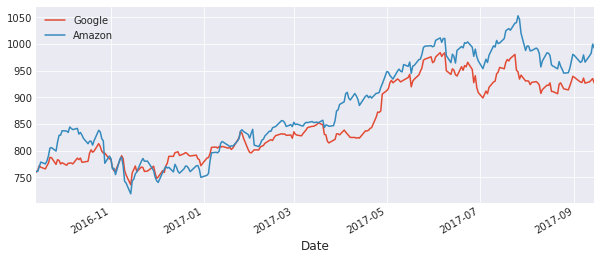

In [66]:
# Let's see a historical view of the closing price
GOOG['Adj Close'].plot(legend=True,figsize=(10,4), label='Google')
AMZN['Adj Close'].plot(legend=True,figsize=(10,4), label='Amazon')

In [67]:
#This is just a showcase example, it is beyond the scope of this class
import seaborn as sns

In [68]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
closing_df = closing_df.sort_index()

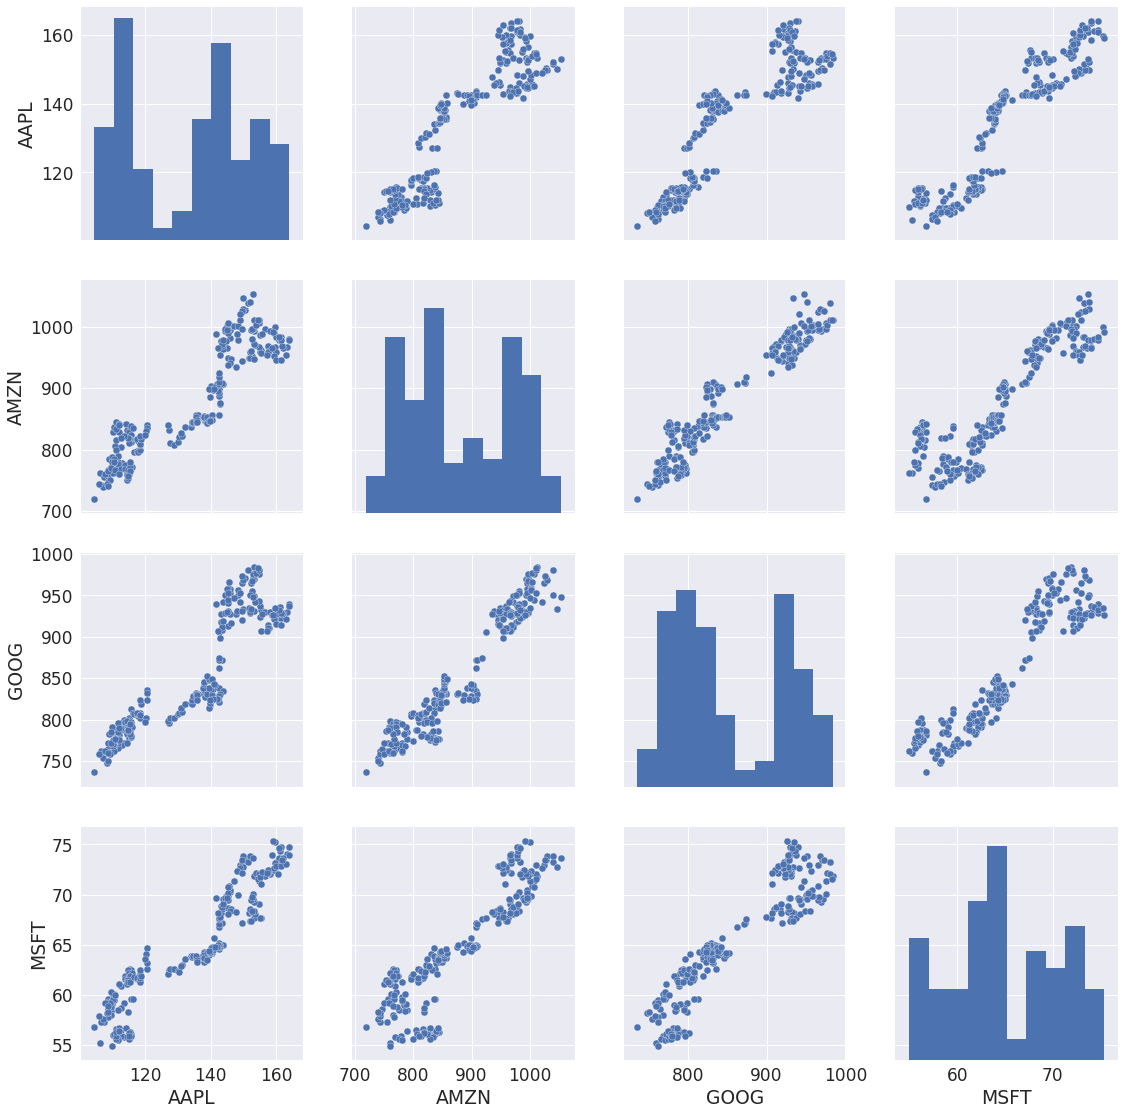

In [69]:
sns.set(font_scale=1.7)
#Simple line that gives us the oevrview of each Stock evolution
sns.pairplot(closing_df.dropna(),size=4)

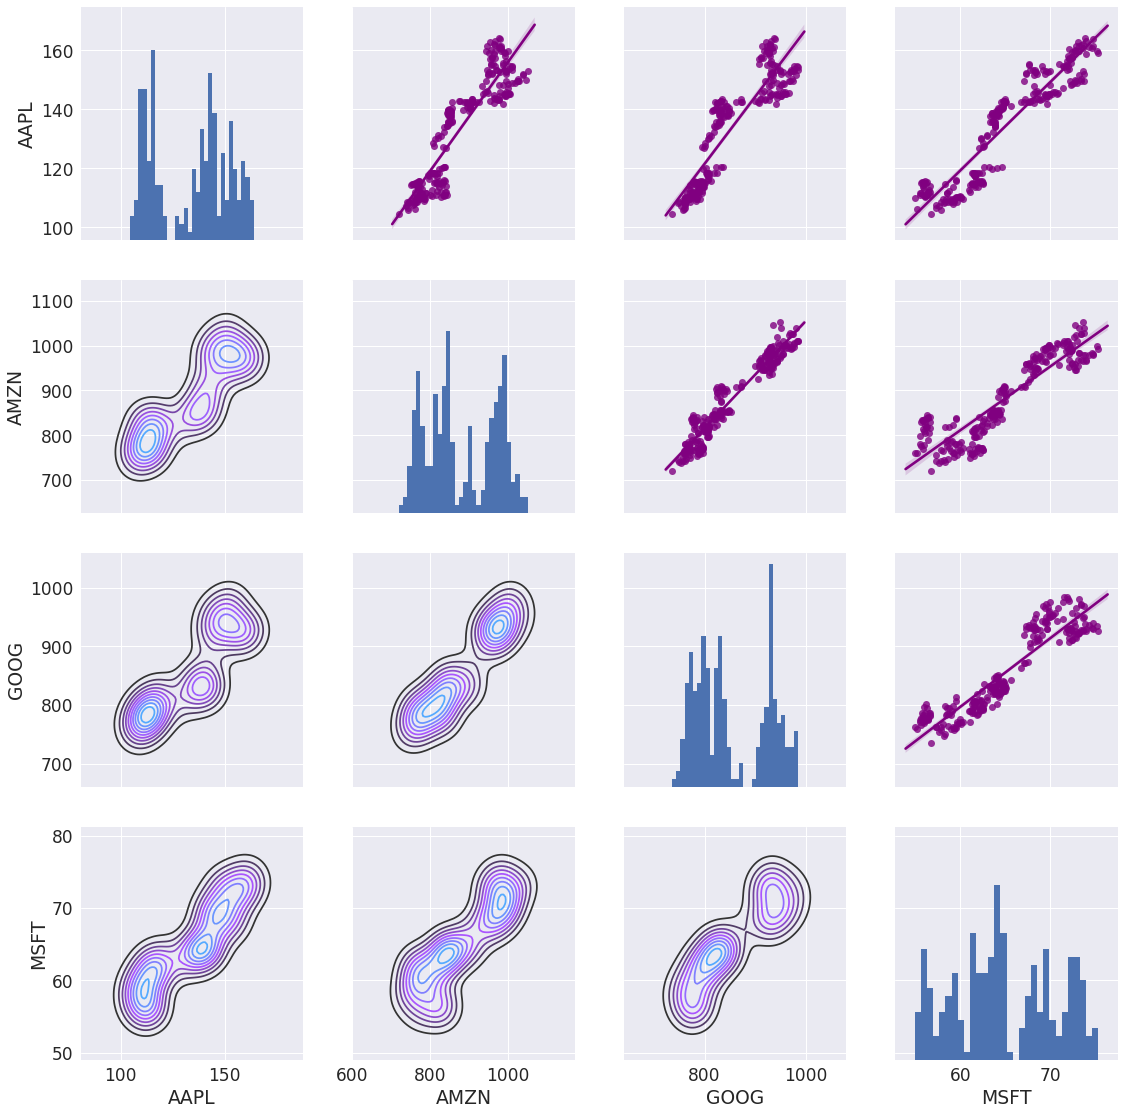

In [70]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df.dropna(),size=4)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

### 5.4 - Extra 2: Pivottables js

In [71]:
#Install it from our anaconda navigator or "conda install pivvottablejs"
from pivottablejs import pivot_ui
import pandas as pd

In [72]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
df = pd.read_csv(url, sep = '\s+',names = ['MPG','Cylinders','Displacement','Horse power','Weight','Acceleration','Model Year','Origin','Car Name'])
df.head() 

,MPG,Cylinders,Displacement,Horse power,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [73]:
pivot_ui(df)